<a href="https://colab.research.google.com/github/komh9575/first-repository/blob/main/day6_%20%ED%86%B5%EA%B3%84%20%EA%B0%80%EC%84%A4%EA%B2%80%EC%A0%95%20%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 필요 라이브러리 설치
!pip install statsmodels

# 코랩에서 한글 폰트 사용을 위한 설정
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타임 다시 시작 안내
# 위 코드 실행 후 상단 메뉴에서 [런타임] > [런타임 다시 시작]을 눌러주세요.
# 런타임을 다시 시작해야 한글 폰트가 적용됩니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 1 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [17]:
# 런타임 다시 시작 후, 이 셀을 실행하여 라이브러리와 폰트를 로드합니다.
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

In [18]:
# 실습용 데이터셋 불러오기
df = pd.read_csv('/content/sample_data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 🚩 [Step 1] 질문의 발견: 데이터 탐색과 문제 정의

**"데이터는 어떤 이야기를 하고 있나요?"**

분석의 시작은 좋은 질문을 던지는 것입니다. 코드를 작성하기 전, 데이터를 뜯어보며 분석할 가치가 있는 주제를 발굴하세요.

- **✅ Check Point:**
    1. **데이터 훑어보기 (EDA):** 결측치는 없는지, 각 변수의 분포(평균, 최대/최소 등)는 상식적인지 확인합니다.
    2. **시각화로 힌트 얻기:**
        - `pairplot`으로 변수들끼리 짝지어 전체적인 흐름을 봅니다.
        - `boxplot`을 그려보세요. 흡연자와 비흡연자의 의료비 차이가 눈에 보이나요? 남녀 간의 차이는 어떤가요?
        - `scatterplot`으로 나이(age)나 BMI가 증가할 때 의료비(charges)가 어떻게 변하는지 패턴을 관찰합니다.
    3. **핵심 질문 정의:** 탐색을 통해 **검증하고 싶은 질문 2가지**를 확정합니다.
        - **질문 A (비교):** (예) "특정 그룹(예: 흡연 여부) 간에 의료비 차이가 통계적으로 유의미한가?"
        - **질문 B (관계):** (예) "수치형 변수(예: BMI)는 의료비에 어떤 영향을 미치는가?"

In [19]:
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


본 데이터셋에는 결측치가 존재하지 않으며, 별도의 결측치 처리 없이 분석 진행이 가능하다. 데이터 타입으로는 float64(2), int64(2), object(3)가 나왔다.

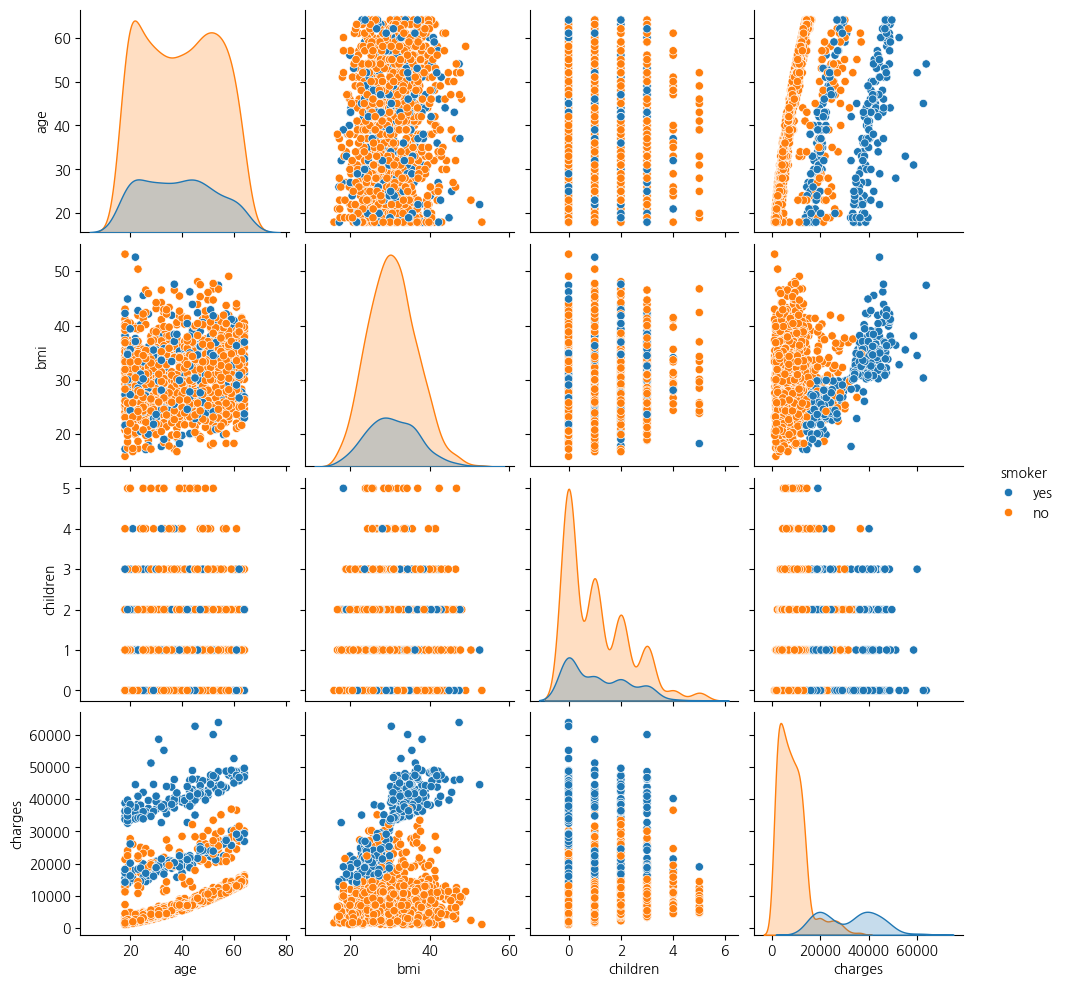

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df,
    hue="smoker",          # 흡연 여부로 색상 구분
    diag_kind="kde"
)
plt.show()


1. 나이(age)와 의료비(charge)의 관계를 유의미하게 살펴볼 필요성이 있다.

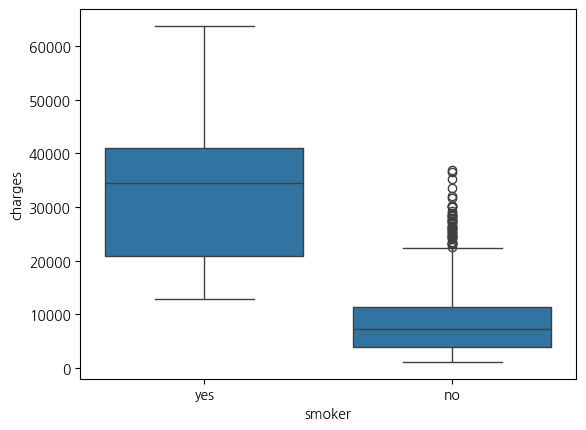

In [21]:
sns.boxplot(x="smoker", y="charges", data=df)
plt.show()

흡연 여부가 의료비에 미치는 영향이 매우 크다

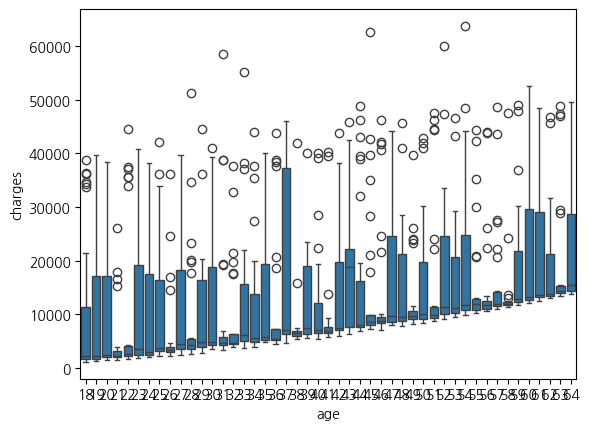

In [22]:
sns.boxplot(x="age", y="charges", data=df)
plt.show()

1. 연령이 증가함에 따라 의료비의 중앙값과 변동성이 함께 증가
2. 모든 연령대에서 일부 고액 의료비 이상치 존재

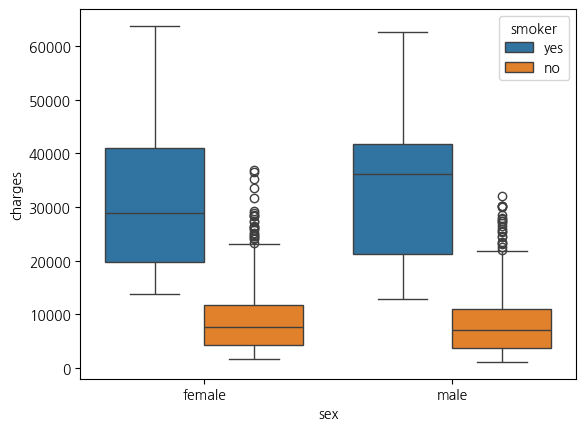

In [23]:
sns.boxplot(x="sex", y="charges", hue="smoker", data=df)
plt.show()

1. 분석결과 남녀의 의료비 차이는 거의 없었다.
2. 전반적으로 성별보다는 흡연 여부가 의료비에 훨씬 더 큰 영향을 미치는 요인임을 확인할 수 있다.

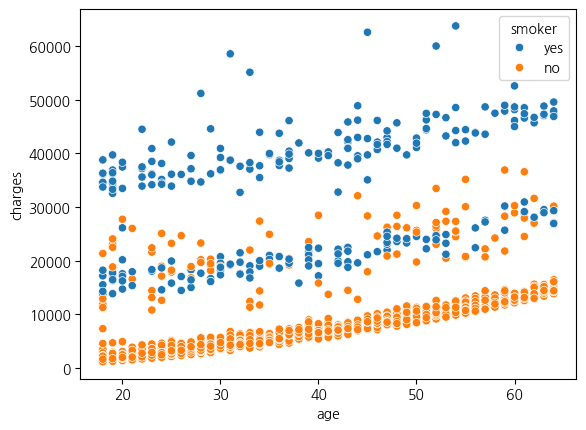

In [24]:
sns.scatterplot(x="age", y="charges", hue="smoker", data=df)
plt.show()

1. 나이에 따라서 의료비 지급은 점점 더 많아지고 있는 추세이다.

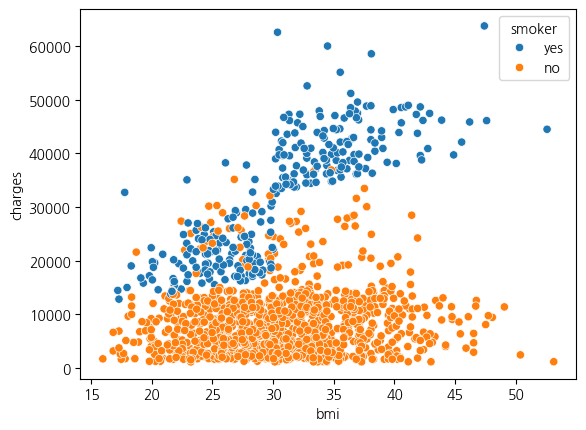

In [25]:
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df)
plt.show()

1. 흡연자인 경우 bmi가 증가할수록 의료비가 증가하는 형태를 보인다.
2. 두 개의 점들이 뚜렷한 군집으로 나뉜다.

3. **핵심 질문 정의:** 탐색을 통해 **검증하고 싶은 질문 2가지**를 확정합니다.
    - **질문 A (비교):** (예) "특정 그룹(예: 흡연 여부) 간에 의료비 차이가 통계적으로 유의미한가?"

    = 흡연 여부 간의 의료비 차이는 통계적으로 유의미하다.

    - **질문 B (관계):** (예) "수치형 변수(예: BMI)는 의료비에 어떤 영향을 미치는가?"
    
    = BMI가 증가할수록 의료비가 증가하는 형태를 보인다.


### 🚩 [Step 2] 가설의 검증: 통계적 근거 마련하기

**"눈대중이 아니라, 숫자로 증명하세요."**

그래프에서 차이가 있어 보인다고 해서 진짜 차이가 있는 것은 아닙니다. 통계적 검정 방법을 통해 여러분의 주장에 객관성을 더하세요.

- **✅ Check Point:**
    1. **가설 설정:** '질문 A'를 바탕으로 귀무가설(**$H_0$**)과 대립가설(**$H_1$**)을 명확히 적습니다.
    2. **분석 방법 선택 및 정당화 (⭐핵심):**
        - 나의 가설을 검증하기 위해 어떤 통계 검정(T-test, ANOVA, Chi-square 등)을 써야 할까요?
        - **왜 그 방법을 선택했나요?** 데이터의 특성(집단의 수, 데이터의 분포 등)을 근거로 선택 이유를 설명해야 합니다.
    3. **결과 해석:** p-value가 0.05보다 작은가요? 그렇다면 이것은 통계적으로 무엇을 의미하나요? 결과를 바탕으로 결론을 내립니다.

1. 귀무가설: 흡연 여부 간의 의료비 차이는 없다.
2. 대립가설: 흡연 여부 간의 의료비 차이는 있다.

이 방법을 확인하기 위해 t-test를 해야 한다.
데이터의 특성은 흡연자와 비흡연자의 두 집단이 있다. 분산분석이 아니다.
데이터의 분포는 넓게 퍼져 있으며, 모집단에서 표본(샘플)을 추출해서 비교해야 한다.

질문.
1. 정규성 분포인가?
2. 등분산성을 보이고 있는가?


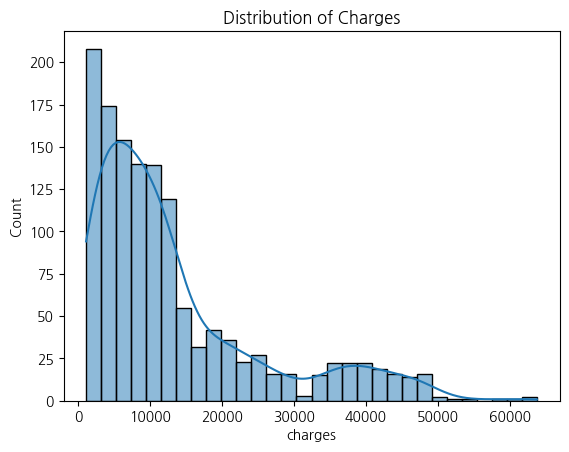

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Charges")
plt.show()

정규분포가 아니라, 오른쪽으로 꼬리가 치우쳐 있다.

In [27]:
from scipy.stats import shapiro

stat, p = shapiro(df['charges'])
print(f"Shapiro-Wilk statistic={stat:.4f}, p-value={p:.4f}")

Shapiro-Wilk statistic=0.8147, p-value=0.0000


1. Shapiro–Wilk 통계량은 1에 가까울수록 정규성에 가까움
2. 의료비는 정규분포를 보인다고 할 수 없음

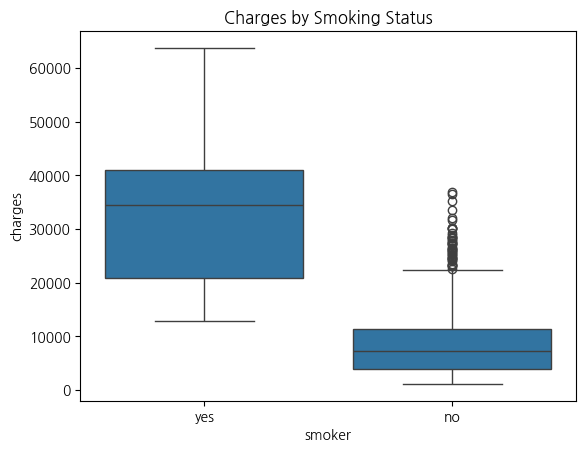

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x="smoker", y="charges", data=df)
plt.title("Charges by Smoking Status")
plt.show()

상자 크기·범위 차이 크고 이상치가 확인된다.

1.흡연자 중에서도 BMI 수준에 따라 의료비에 차이가 존재하는가?” (그리고 만약 그렇다면) 이것은 통계적으로 유의미한가?

* 귀무가설: 흡연자 중 BMI 집단 간 평균 의료비의 차이는 없다
* 대립가설: 흡연자 중 BMI 집단 간 평균 의료비의 차이가 있다

# Welch t-test의 기능
두 집단의 분산이 같지 않아도 사용 가능/ 표본 크기가 달라도 안정적

In [35]:
from scipy import stats

# 1. 흡연자만 필터링
smokers = df[df['smoker'] == 'yes']

# 2. BMI 기준으로 집단 구분
bmi_low = smokers[smokers['bmi'] < 25]['charges']
bmi_high = smokers[smokers['bmi'] >= 25]['charges']

# 3. Welch t-test 수행
t_stat, p_value = stats.ttest_ind(
    bmi_low,
    bmi_high,
    equal_var=False  # Welch t-test
)

# 4. 결과 출력
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -16.05979577468101
p-value: 3.1540546282980927e-38


- 유의수준이 0.05 이하이므로 귀무가설을 기각해야 한다.
- 흡연자 중의 BMI집단 간 평균 의료비 차이는 통계적으로 유의미한 결과를 보인다고 해석할 수 있다.

### BMI가 1 증가할 때 의료비는 평균적으로 얼마나 증가하는가? (charges=β0​+β1​⋅bmi+ε)

In [37]:
import statsmodels.api as sm

# 1. 흡연자만 필터링
smokers = df[df['smoker'] == 'yes']

# 2. 독립변수(X)와 종속변수(Y)
X = smokers['bmi']
y = smokers['charges']

# 3. 상수항 추가
X = sm.add_constant(X)

# 4. OLS 회귀분석
model = sm.OLS(y, X).fit()

# 5. 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     506.1
Date:                Thu, 18 Dec 2025   Prob (F-statistic):           5.02e-64
Time:                        03:22:28   Log-Likelihood:                -2807.2
No. Observations:                 274   AIC:                             5618.
Df Residuals:                     272   BIC:                             5626.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.319e+04   2052.885     -6.423      0.0

R-squared:  0.650
bmi  coef: 1473.1063

= 흡연자 집단에서 의료비 변동의 약 65%가 BMI로 설명됨

= 흡연자 집단에서 BMI가 1 증가할 때 평균 의료비는 약 1,473 증가

귀무가설 (H₀)
고위험군 여부는 의료비에 영향을 미치지 않는다

대립가설 (H₁)
고위험군은 의료비가 유의하게 높다

In [38]:
import statsmodels.api as sm
import numpy as np

df['high_bmi'] = (df['bmi'] >= 25).astype(int)
df['smoker_dummy'] = (df['smoker'] == 'yes').astype(int)
df['high_risk'] = df['high_bmi'] * df['smoker_dummy']

X = df[['high_risk']]
X = sm.add_constant(X)
y = df['charges']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     2349.
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          1.36e-296
Time:                        05:13:34   Log-Likelihood:                -13799.
No. Observations:                1338   AIC:                         2.760e+04
Df Residuals:                    1336   BIC:                         2.761e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8994.8363    218.075     41.247      0.0

OLS 회귀분석 결과, 흡연과 고BMI를 동시에 가진 고위험군은 그렇지 않은 집단에 비해 평균 의료비가 약 26,120만큼 유의하게 높았다 (p < 0.001).
- (R² = 0.637)
- const 8994.8363
- high_risk 2.612e+04

- 질문1. 고위험군 효과는 흡연과 고BMI의 단순 합인가, 상호작용의 결과인가?
- 질문2. 고위험군 변수는 다른 변수(BMI, 나이 등)를 추가해도 여전히 강력한가?(다른 요인을 통제해도 고위험군 효과는 유지되는가?)


# 고위험군 효과는 흡연과 고BMI의 단순 합인가, 상호작용의 결과인가?


In [39]:
# 고위험군 효과는 흡연과 고BMI의 단순 합인가, 상호작용의 결과인가?

import statsmodels.api as sm

# 1. 더미 변수 생성
df['smoker_dummy'] = (df['smoker'] == 'yes').astype(int)
df['high_bmi'] = (df['bmi'] >= 25).astype(int)

# 2. 상호작용 변수
df['interaction'] = df['smoker_dummy'] * df['high_bmi']

# 3. 회귀분석 변수 설정
X = df[['smoker_dummy', 'high_bmi', 'interaction']]
X = sm.add_constant(X)
y = df['charges']

# 4. OLS 회귀분석
model = sm.OLS(y, X).fit()

# 5. 결과 출력
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     915.5
Date:                Thu, 18 Dec 2025   Prob (F-statistic):          2.96e-323
Time:                        05:29:44   Log-Likelihood:                -13730.
No. Observations:                1338   AIC:                         2.747e+04
Df Residuals:                    1334   BIC:                         2.749e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         7515.7089    502.886     14.945   

- const = 7,515.71
- smoker_dummy = 12,320
- high_bmi = 1118.2462
- interaction = 1.416e+04   
- 7,515.71(비흡연+저BMI)+12,320(흡연)+1,118(고BMI)+14,160(흡연*고BMI)=27,598

- 회귀분석 결과, 흡연과 고BMI의 상호작용 항이 통계적으로 유의하게 나타나, 고위험군의 의료비 증가는 두 요인의 단순한 합이 아니라 상호작용에 의해 증폭되는 것으로 확인되었다 (p < 0.001).
- 흡연은 BMI와 의료비 간의 관계를 증폭시키는 조절 변수로 작용한다.
- 흡연과 비만이 독립적인 위험 요인이기보다는, 서로 결합될 때 의료비 부담을 비선형적으로 증폭시키는 복합 위험 요인임을 시사한다.

# 질문2. 고위험군 변수는 다른 변수(BMI, 나이 등)를 추가해도 여전히 강력한가?

(다른 요인을 통제해도 고위험군 효과는 유지되는가?


In [40]:
import statsmodels.api as sm

# 1. 더미 변수 및 고위험군 변수 생성
df['smoker_dummy'] = (df['smoker'] == 'yes').astype(int)
df['high_bmi'] = (df['bmi'] >= 25).astype(int)
df['high_risk'] = df['smoker_dummy'] * df['high_bmi']

# 2. 성별 더미 변수 (male=1, female=0)
df['sex_dummy'] = (df['sex'] == 'male').astype(int)

# 3. 회귀분석 변수 설정 (고위험군 + 통제변수)
X = df[['high_risk', 'age', 'bmi', 'sex_dummy', 'children']]
X = sm.add_constant(X)
y = df['charges']

# 4. OLS 회귀분석
model = sm.OLS(y, X).fit()

# 5. 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     751.1
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        06:02:25   Log-Likelihood:                -13581.
No. Observations:                1338   AIC:                         2.717e+04
Df Residuals:                    1332   BIC:                         2.721e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4038.1019    971.482     -4.157      0.0

- 결정계수는 R² = 0.738 (Adj. R² = 0.737)로 나타나,
본 회귀모형은 의료비 변동의 약 73.8%를 설명하는 것으로 확인되었다. 이는 의료비 자료의 특성을 고려할 때 매우 높은 설명력으로, 모형이 자료를 잘 설명하고 있음을 시사한다.
- 또한 모형 전체의 유의성을 검정한 결과,
F-statistic의 p-value는 0.001보다 작은 값으로 나타나,
본 회귀모형은 통계적으로 유의미한 것으로 확인되었다.
- high_risk 계수: +26,120
- p-value: < 0.001
- 95% 신뢰구간: [25,200, 27,000]
이를 해석하면, 나이, BMI, 성별, 자녀 수를 모두 통제한 상태에서도 흡연과 고BMI를 동시에 가진 고위험군은 그렇지 않은 집단에 비해 평균 의료비가 약 26,120만큼 더 높은 것으로 나타났으며, 해당 효과는 통계적으로 매우 유의하다(p < 0.001). 이는 고위험군 효과가 다른 주요 설명변수로 설명되지 않는 독립적이고 강력한 효과임을 시사한다.

- 나이, BMI, 성별, 자녀 수를 모두 통제해도 고위험군(high_risk)의 의료비 효과는 전혀 약해지지 않았고, 매우 강력하게 유지되었다.



In [41]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# 공통 변수
y = df['charges']

# Model 1: high_risk만
X1 = sm.add_constant(df[['high_risk']])
m1 = sm.OLS(y, X1).fit()

# Model 2: age + bmi 통제
X2 = sm.add_constant(df[['high_risk', 'age', 'bmi']])
m2 = sm.OLS(y, X2).fit()

# Model 3: age + bmi + sex + children 통제
X3 = sm.add_constant(df[['high_risk', 'age', 'bmi', 'sex_dummy', 'children']])
m3 = sm.OLS(y, X3).fit()


In [42]:
coef_values = [
    m1.params['high_risk'],
    m2.params['high_risk'],
    m3.params['high_risk']
]

model_names = [
    'High-risk only',
    '+ Age, BMI',
    '+ Age, BMI, Sex, Children'
]


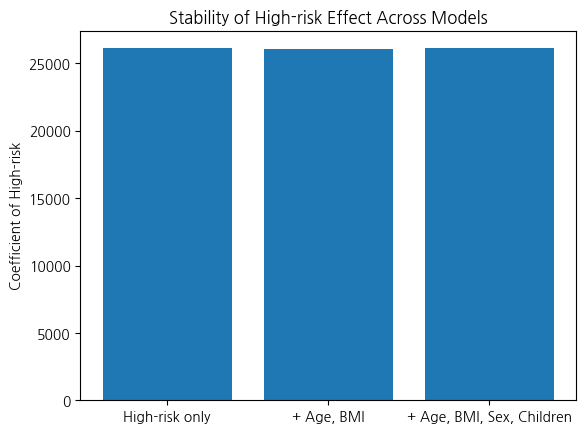

In [43]:
plt.figure()
plt.bar(model_names, coef_values)
plt.ylabel('Coefficient of High-risk')
plt.title('Stability of High-risk Effect Across Models')
plt.show()

- 막대 높이가 거의 같기 때문에, 통제해도 효과가 약해지지 않음을 시각적으로 확인할 수 있었음